In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Loading the dataset

In [18]:
data = pd.read_csv('C:\\Users\\ANTRA RAJPUROHIT\\OneDrive\\Documents\\VS Code\\The Grip TSF\\The-Sparks-Foundation-Tasks\\data\\task3_SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


Step 2: Exploratory data analysis

Overview of the dataset

In [19]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2 

Statistical Summary

In [20]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


Check for missing values

In [21]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


Check data types

In [22]:
print("\nData Types:")
print(data.dtypes)


Data Types:
Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


Identify unique values in categorical columns

In [23]:
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category']
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"\nUnique values in {column}:")
    print(unique_values)


Unique values in Ship Mode:
['Second Class' 'Standard Class' 'First Class' 'Same Day']

Unique values in Segment:
['Consumer' 'Corporate' 'Home Office']

Unique values in Country:
['United States']

Unique values in City:
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tam

Step 3: Analyzing weak areas and business problems

Sales and Profit analysis by Category and Sub-Category

In [24]:
category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
subcategory_profit = data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

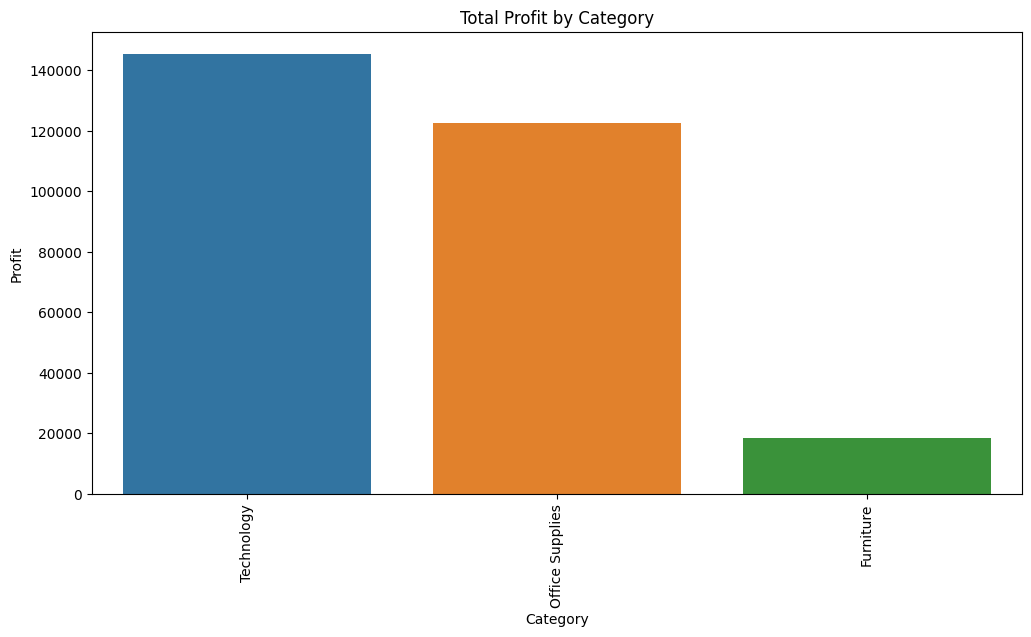

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

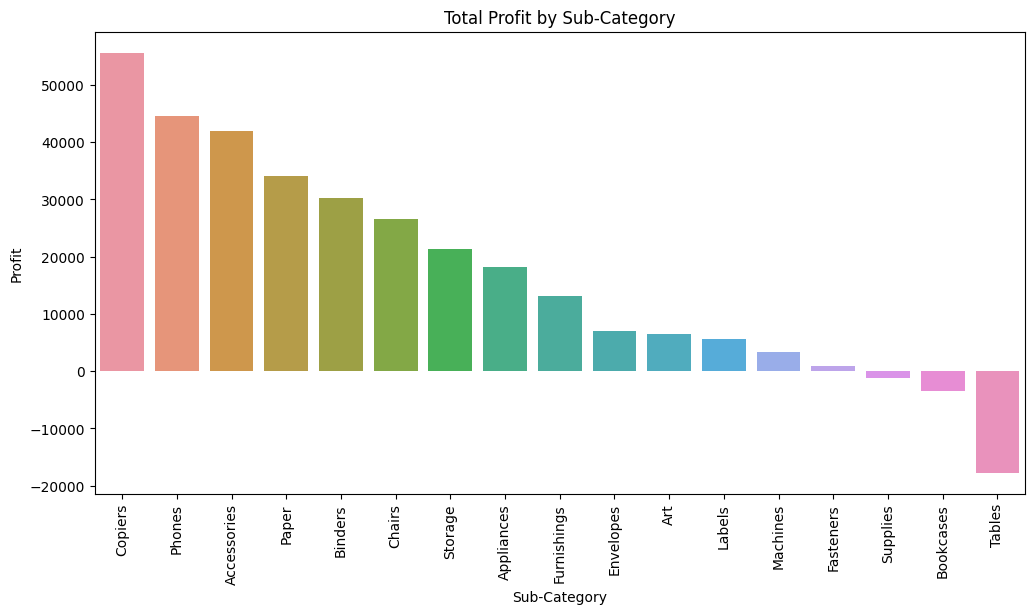

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_profit.index, y=subcategory_profit.values)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

Sales and Profit analysis by Region

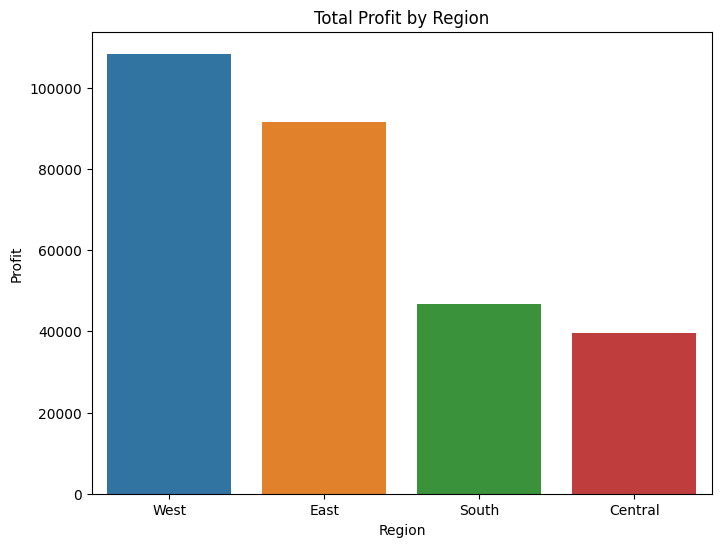

In [27]:
region_profit = data.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

Discount analysis

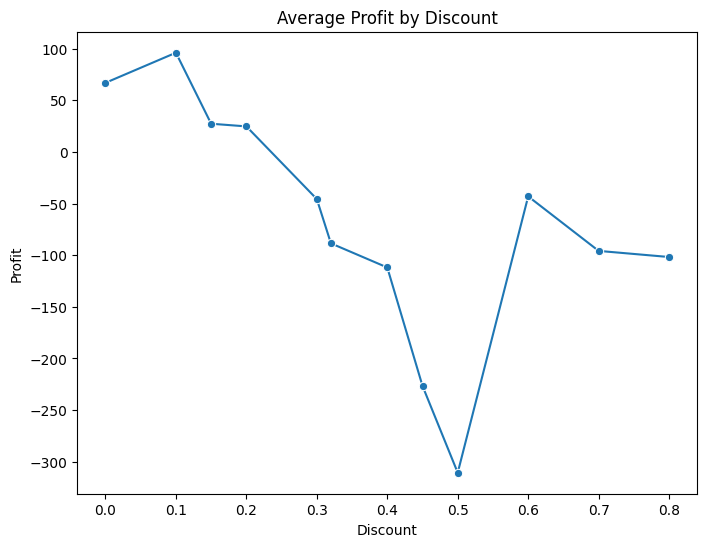

In [28]:
discount_profit = data.groupby('Discount')['Profit'].mean()

plt.figure(figsize=(8, 6))
sns.lineplot(x=discount_profit.index, y=discount_profit.values, marker='o')
plt.title('Average Profit by Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

Quantity analysis

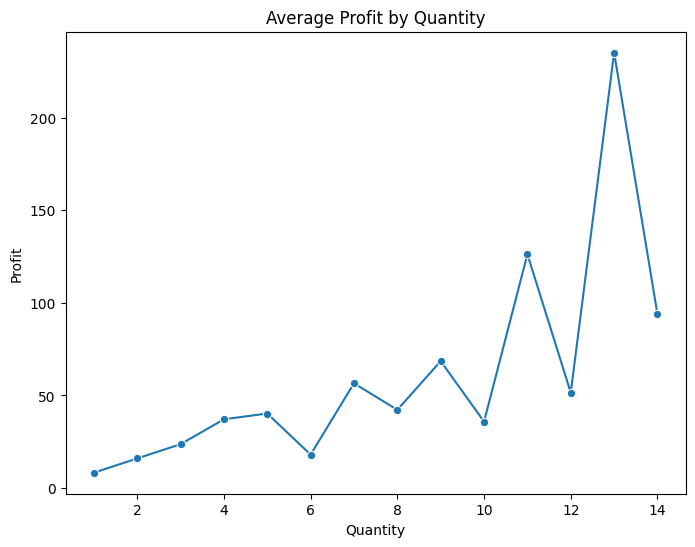

In [29]:
quantity_profit = data.groupby('Quantity')['Profit'].mean()

plt.figure(figsize=(8, 6))
sns.lineplot(x=quantity_profit.index, y=quantity_profit.values, marker='o')
plt.title('Average Profit by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()